recoding of Kate's H3_5_ref_inputs.ipynb with open-source python

# Add reference input layers and thier attributes to H3_5 hex layer

conda info

```
conda create --name h3 -c conda-forge h3-py numpy pandas geopandas shapely fiona dask matplotlib ipykernel
```

Note: this gets us h3 version 3.7.7 which is no longer maintained. h3 version 4 is still in beta though. Eventually we should switch to h3 version 4 when it is out of beta and python bindings are available through conda. There are major changes including the function name for producing the grid changing from h3.polyfill to h3.polygonToCells

In [1]:
# import packages
# from h3 import h3
import h3
import pandas as pd
import geopandas as gpd
import shapely
import fiona
import dask
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data locations
#K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb
inputs_gdb=r'C://Users/kerrie/Documents/01_LocalCode/repos/h3_project/data/H3Grid_inputs.gdb'
counties_shp=r'C://Users/kerrie/Documents/01_LocalCode/repos/h3_project/data/cb_2018_us_county_500k/cb_2018_us_county_500k.shp'

In [3]:
# constants
states=['TEXAS','LOUISIANA','MISSISSIPPI','ALABAMA','FLORIDA','GEORGIA']

# Create hex grid

It looks like Kate did this in ArcGIS and exported the grid to a geodatabase. Instead of re-using that gdb, I am testing creating the grid with open source python

steps:
- subset counties shp file to southern states
- reproject to epsg 4326
- create unary union polygon (overall domain boundary)


In [4]:
layers=fiona.listlayers(inputs_gdb)
# layers

In [5]:
counties=gpd.read_file(inputs_gdb,layer='tj_2021_us_st_cnt')
counties

STATE_FP STATE_AB     STATE_NM COUNTY_FP  CNTY_NAME GEO_ID   Shape_Length  \
0         48       TX        Texas       327     Menard  48327  238457.030449   
1         48       TX        Texas       189       Hale  48189  247069.201615   
2         01       AL      Alabama       027       Clay  01027  244308.319067   
3         48       TX        Texas       011  Armstrong  48011  237831.037012   
4         13       GA      Georgia       189   McDuffie  13189  180661.906160   
..       ...      ...          ...       ...        ...    ...            ...   
688       22       LA    Louisiana       041   Franklin  22041  350762.128745   
689       28       MS  Mississippi       155    Webster  28155  192061.670531   
690       13       GA      Georgia       123     Gilmer  13123  205439.096026   
691       28       MS  Mississippi       089    Madison  28089  332179.456966   
692       48       TX        Texas       227     Howard  48227  229339.610290   

       Shape_Area                                           geometry  
0    3.183344e+09  MULTIPOLYGON (((-11106479.975 3595247.469, -11...  
1    3.802197e+09  MULTIPOLYGON (((-11325094.051 4005816.874, -11...  
2    2.251228e+09  MULTIPOLYGON (((-9534739.201 3928852.137, -953...  
3    3.532396e+09  MULTIPOLYGON (((-11252985.285 4167562.488, -11...  
4    9.940880e+08  MULTIPOLYGON (((-9172653.863 3961440.311, -917...  
..            ...                                                ...  
688  2.300692e+09  MULTIPOLYGON (((-10203164.051 3756470.588, -10...  
689  1.584644e+09  MULTIPOLYGON (((-9932734.212 3964832.890, -993...  
690  1.654912e+09  MULTIPOLYGON (((-9384497.594 4106723.640, -938...  
691  2.717682e+09  MULTIPOLYGON (((-10035322.603 3815966.799, -10...  
692  3.287754e+09  MULTIPOLYGON (((-11263460.764 3791240.602, -11...  

[693 rows x 9 columns]

In [6]:
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

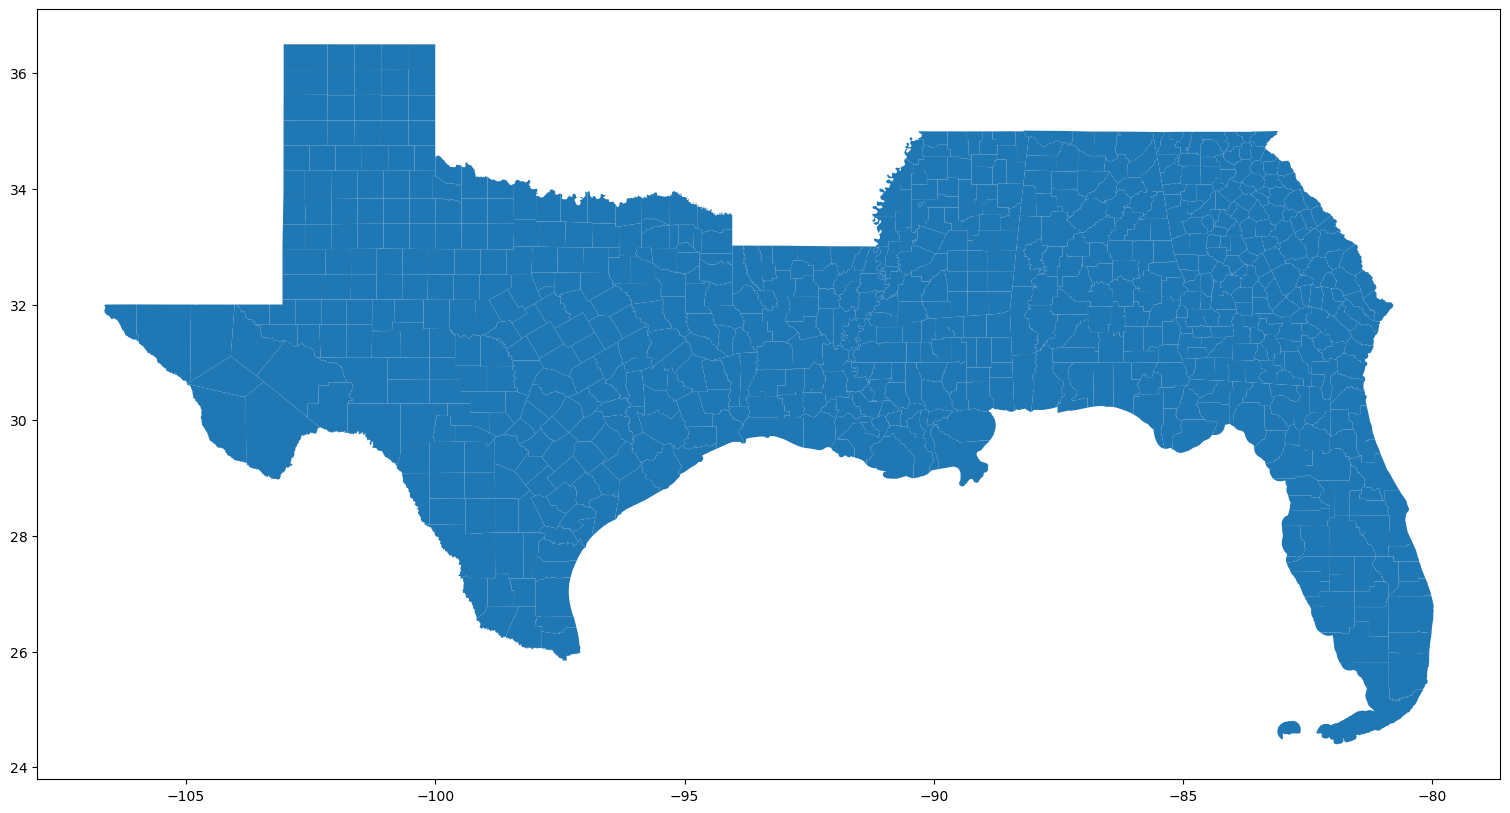

In [7]:
counties=counties.to_crs("EPSG:4326")
counties.plot(figsize=(20,10))


In [8]:
region_union=shapely.ops.unary_union(counties.geometry)

# # for this region there are two polygons: the big one and one for the florida keys
# # see there are 2 in the list
# print(list(region_union.geoms))

# # quick view of the polygons
# region_union

# # region_union.geoms[i] would access each polygon

In [ ]:
# this returns a dictionary of info about the shape that includes
# the shape type (polygon) and x,y coordinates of the polygon nodes 
# returned as a tuple of tuples ((x,y),(x,y),...)

# shapely.geometry.mapping(region_union.geoms[1])

In [ ]:
# # this returns a dictionary of info about the shapes that includes
# # the shape type (polygon) and x,y coordinates of the polygon nodes  
# # which are returned as a tuple of tuples ((x,y),(x,y),...)
# temp  = shapely.geometry.mapping(region_union.geoms[0])

# # reorganize the node coordinates into a list(list( (y,x) tuples))
# # why does it need so much nesting? no idea, maybe just the formatting of shapely .mapping
# temp['coordinates']=[[ (y,x) for x,y in temp['coordinates'][0] ]]

# temp

# # for x,y in temp['coordinates'][0]:
# #     print(x,y)
# #     print(z)

In [ ]:
# temp['coordinates'][0]

In [ ]:
# %%time
# hexsize = 5
# hex_list = h3.polyfill(temp,hexsize)
# # hex_list

In [ ]:
# %%time
# # create hex dataframe
# hex_col = 'hex{}'.format(hexsize)
# dfh = pd.DataFrame(hex_list,columns=[hex_col])
# print('Sanity Check\nnumber of hexes:', len(hex_list))
# print('number of duplicates:', len(hex_list) - len(dfh.drop_duplicates()))

# # add lat & lng of center of hex 
# dfh['lat']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
# dfh['lon']=dfh[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# # create Point object based on hex lat lon
# dfh['geometry'] = dfh.apply(lambda x: shapely.geometry.Point(x.lon,x.lat),1)

# dfh

In [ ]:
# h3.polyfill does not have an integrated parallelization option
# we need to manually parallelize by dividing the large polygon into multiple piece that don't overlap
# we'll divide into vertical strips

# from shapely.ops import split
# pt = Point((1, 1))
# line = LineString([(0,0), (2,2)])
# result = split(line, pt)

# poly=region_union.geoms[0]
# line=shapely.LineString([(-90,45),(-90,15)])
# sub_polys=shapely.ops.split(poly,line)
# sub_polys

-106.64565579307649 -79.97430864405231 24.396312300283807 36.50071011242726
[-105.76208843562527, -104.37852107817407, -102.99495372072286, -101.61138636327165, -100.22781900582044, -98.84425164836924, -97.46068429091802, -96.07711693346681, -94.69354957601561, -93.3099822185644, -91.92641486111319, -90.54284750366199, -89.15928014621078, -87.77571278875956, -86.39214543130836, -85.00857807385715, -83.62501071640594, -82.24144335895473, -80.85787600150353]


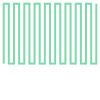

In [9]:
# build a single line shape that will cut the polygon into strips

# find the min/max x,y extents of the polygon
poly=region_union.geoms[0]
x,y=poly.exterior.coords.xy
print(min(x),max(x),min(y),max(y))

# create new geometry object
buff_x = 0.5
buff_y=2.
latN=max(y)+buff_y
latS=min(y)-buff_y
lonW=min(x)-buff_x
lonE=max(x)+buff_x

# approximate number of sub polygons to split into
# this is approximately because sometimes jagged coastlines
# will result in a few more sub polygons than nchunks
nchunks=20  

# may have to add and if/error for cases where the number of chunks puts a vertical line in the buffer area
xvals=np.linspace(lonW,lonE,nchunks+1)[1:-1].tolist()
print(xvals)
# drawing a snake-like line for splitting our polygon
# shapely uses coordinate in the order (x,y)
xy_coords=[]
for i,xval in enumerate(xvals):
    if i%2 == 0:
        xy_coords.append([xval,latS])
        xy_coords.append([xval,latN])
    else:
        xy_coords.append([xval,latN])
        xy_coords.append([xval,latS])

line=shapely.LineString(xy_coords)
line

In [10]:
# split the polygon into strips that don't overlap
# the number of strips/new polygons is approximately equal to nchunks
subpolys=shapely.ops.split(poly,line)
subpolys

In [ ]:
# subpolys.geoms[4]
# shapely.geometry.mapping(subpolys.geoms[4])

In [11]:
def create_h3grid(hexsize,poly,seg_ind):
    # h3 uses coordinates in the order (y,x), the opposite of shapely
    # get polygon coordinates and reverse order to (y,x)
    temp  = shapely.geometry.mapping(poly)
    temp['coordinates']=[[ (y,x) for x,y in temp['coordinates'][0] ]]

    # fill polygon with hexes
    hex_list = h3.polyfill(temp,hexsize)
    # hex_list=h3.polygonToCells(temp,hexsize) # v4

    # create dataframe with hex id 
    colname='hex{}'.format(hexsize)
    dfh = pd.DataFrame(hex_list,columns=[colname])
    # dfh=dfh.assign(segment_index=seg_ind) # for testing
    print('number of duplicates:', len(hex_list) - len(dfh.drop_duplicates()))


    # create Point object based on hex center lat lon
    dfh['lat']=dfh[colname].apply(lambda x: h3.h3_to_geo(x)[0])
    dfh['lon']=dfh[colname].apply(lambda x: h3.h3_to_geo(x)[1])

    # switch hexes back to x,y and create shapely polygon geometry column
    dfh['geometry']=dfh[colname].apply(lambda p: shapely.geometry.Polygon([(x,y) for y,x in h3.h3_to_geo_boundary(p)]))                            

    return dfh


In [ ]:
# # for i,subpoly in enumerate(subpolys.geoms)
# len(list(subpolys.geoms))

In [12]:
task_list=[dask.delayed(create_h3grid)(8,subpoly,i) for i,subpoly in enumerate(subpolys.geoms)]
len(task_list)

27

In [13]:
%%time
result_list=dask.compute(*task_list)

result_list[0]

number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
number of duplicates: 0
CPU times: total: 58.1 s
Wall time: 53.1 s


hex8        lat        lon  \
0       8826c95899fffff  32.671300 -96.296994   
1       8848903251fffff  28.242807 -96.821798   
2       88489e1051fffff  29.795509 -97.369818   
3       8848b34e0dfffff  26.645429 -97.363478   
4       88446d8a93fffff  30.074835 -96.249433   
...                 ...        ...        ...   
107753  8826cb635dfffff  31.925878 -97.201217   
107754  88489a0d99fffff  31.329764 -97.103727   
107755  88489e39c9fffff  30.257452 -97.418244   
107756  8826c86463fffff  32.889625 -96.859075   
107757  8826c89841fffff  33.866366 -96.675238   

                                                 geometry  
0       POLYGON ((-96.29672525097422 32.66622353503037...  
1       POLYGON ((-96.82151581097912 28.2376515291124,...  
2       POLYGON ((-97.36950713183843 29.79036580168549...  
3       POLYGON ((-97.36317613458237 26.64025531314766...  
4       POLYGON ((-96.24917290685114 30.06970961226713...  
...                                                   ...  
107753  POLYGON ((-97.20090861076571 31.92077504748429...  
107754  POLYGON ((-97.10342506644474 31.32464953533486...  
107755  POLYGON ((-97.41793018407591 30.25231495046359...  
107756  POLYGON ((-96.8587799789378 32.88454703925804,...  
107757  POLYGON ((-96.6749489620331 33.86131543156131,...  

[107758 rows x 4 columns]

In [14]:
gdf=gpd.GeoDataFrame(pd.concat(result_list,ignore_index=True))
gdf.set_crs('epsg:4326',inplace=True)
gdf

C:\Users\kerrie\AppData\Local\Temp\ipykernel_11512\3687311122.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf=gpd.GeoDataFrame(pd.concat(result_list,ignore_index=True))


hex8        lat        lon  \
0        8826c95899fffff  32.671300 -96.296994   
1        8848903251fffff  28.242807 -96.821798   
2        88489e1051fffff  29.795509 -97.369818   
3        8848b34e0dfffff  26.645429 -97.363478   
4        88446d8a93fffff  30.074835 -96.249433   
...                  ...        ...        ...   
1841323  88441462adfffff  24.627489 -82.280696   
1841324  8844146287fffff  24.635778 -82.301245   
1841325  8844146051fffff  24.619627 -82.268566   
1841326  884414605dfffff  24.612193 -82.264848   
1841327  88441462ebfffff  24.613898 -82.298494   

                                                  geometry  
0        POLYGON ((-96.29673 32.66622, -96.29169 32.668...  
1        POLYGON ((-96.82152 28.23765, -96.81667 28.240...  
2        POLYGON ((-97.36951 29.79037, -97.36459 29.793...  
3        POLYGON ((-97.36318 26.64026, -97.35839 26.643...  
4        POLYGON ((-96.24917 30.06971, -96.24425 30.072...  
...                                                    ...  
1841323  POLYGON ((-82.28102 24.62267, -82.27665 24.624...  
1841324  POLYGON ((-82.30157 24.63096, -82.29720 24.633...  
1841325  POLYGON ((-82.26889 24.61481, -82.26452 24.617...  
1841326  POLYGON ((-82.26517 24.60738, -82.26081 24.609...  
1841327  POLYGON ((-82.29882 24.60908, -82.29445 24.611...  

[1841328 rows x 4 columns]

In [16]:
# gdf_subset=gdf[(gdf['lon']>-105)&(gdf['lon']<-104)&(gdf['lat']<30.5)]
len(pd.unique(gdf['hex8']))

1841328

In [ ]:
# gdf_subset.plot(figsize=(20,10))
gdf.plot(figsize=(20,10))

In [ ]:
gdf.crs

# now that we have the grid, put data on it

In [ ]:
gdf_joined = gpd.tools.sjoin(gdf, counties, how="inner")
gdf_joined.sample(3)

In [ ]:
gdf_joined.plot("COUNTY_FP",figsize=(20,10),cmap='tab20')

In [ ]:
subset=gdf_joined[(gdf_joined['lon']>-103)&(gdf_joined['lon']<-102.5)&(gdf_joined['lat']>32.25)&(gdf_joined['lat']<32.75)]
subset.plot("COUNTY_FP",figsize=(20,10),cmap='tab20')

looks like some hexes are assigned to multiple counties

i think what's happening is since the geometry in the gdf is polygon, the data join is doing a polygon to polygon overlap. i would need to change the geometry column in the gdf to points for the join to use the hex center points and county polygons

let's try again...

In [ ]:
# geopandas allows for only 1 geometry column at a time
# so rename first and then create new one filled with points
gdf.rename(columns={'geometry':'hex_poly'},inplace=True)
gdf['geometry'] = gpd.points_from_xy(gdf['lon'], gdf['lat'])
gdf.set_crs('epsg:4326',inplace=True)
gdf

In [ ]:
# do the join
gdf_joined = gpd.tools.sjoin(gdf, counties, how="inner")

In [ ]:
# now to plot the hexagons we need to name the hex_poly column geometry
gdf_joined.rename(columns={'geometry':'hex_points','hex_poly':'geometry'},inplace=True)

gdf_joined.plot("COUNTY_FP",figsize=(20,10),cmap='tab20')

In [ ]:
subset=gdf_joined[(gdf_joined['lon']>-103)&(gdf_joined['lon']<-102.5)&(gdf_joined['lat']>32.25)&(gdf_joined['lat']<32.75)]
subset.plot("COUNTY_FP",figsize=(20,10),cmap='tab20')

ok, so it works but it's a little wonky and cumbersome

I will checkout h3pandas to see if the process is more streamlined

The hex layer reference inputs were calculated based on Spatial Join with the "Have their center in" match option.

https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/spatial-join.htm
arcpy.analysis.SpatialJoin(target_features, join_features, out_feature_class, {join_operation}, {join_type}, {field_mapping}, {match_option}, {search_radius}, {distance_field_name}, {match_fields})

See also: "K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_Grid_tb_attrbts.docx" 

 ### Step 1. Adding state and county boundary fields

In [ ]:
# # Step 1. Add state and county boundary fields to H3_5 grid, Spatial Join with "Have Their Center IN" option.

# import arcpy
# arcpy.analysis.SpatialJoin(
#     target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_5",
#     join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\tj_2021_us_st_cnt",
#     out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
#     join_operation="JOIN_ONE_TO_ONE",
#     join_type="KEEP_ALL",
#     field_mapping=r'GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,'
#                   r'target_features,'
#                   r'GRID_ID,0,17;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,'
#                   r'target_features,'
#                   r'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,'
#                   r'target_features,'
#                   r'Shape_Area,-1,-1;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
#                   r'join_features,'
#                   r'GEO_ID,0,5',
#     match_option="HAVE_THEIR_CENTER_IN",
#     search_radius=None,
#     distance_field_name=""
# )
# # The DeleteField function is used to remove the extra fields created during the join.
# arcpy.management.DeleteField(
#     in_table= r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
#     drop_field="Join_Count;TARGET_FID",
#     method="DELETE_FIELDS"
# )


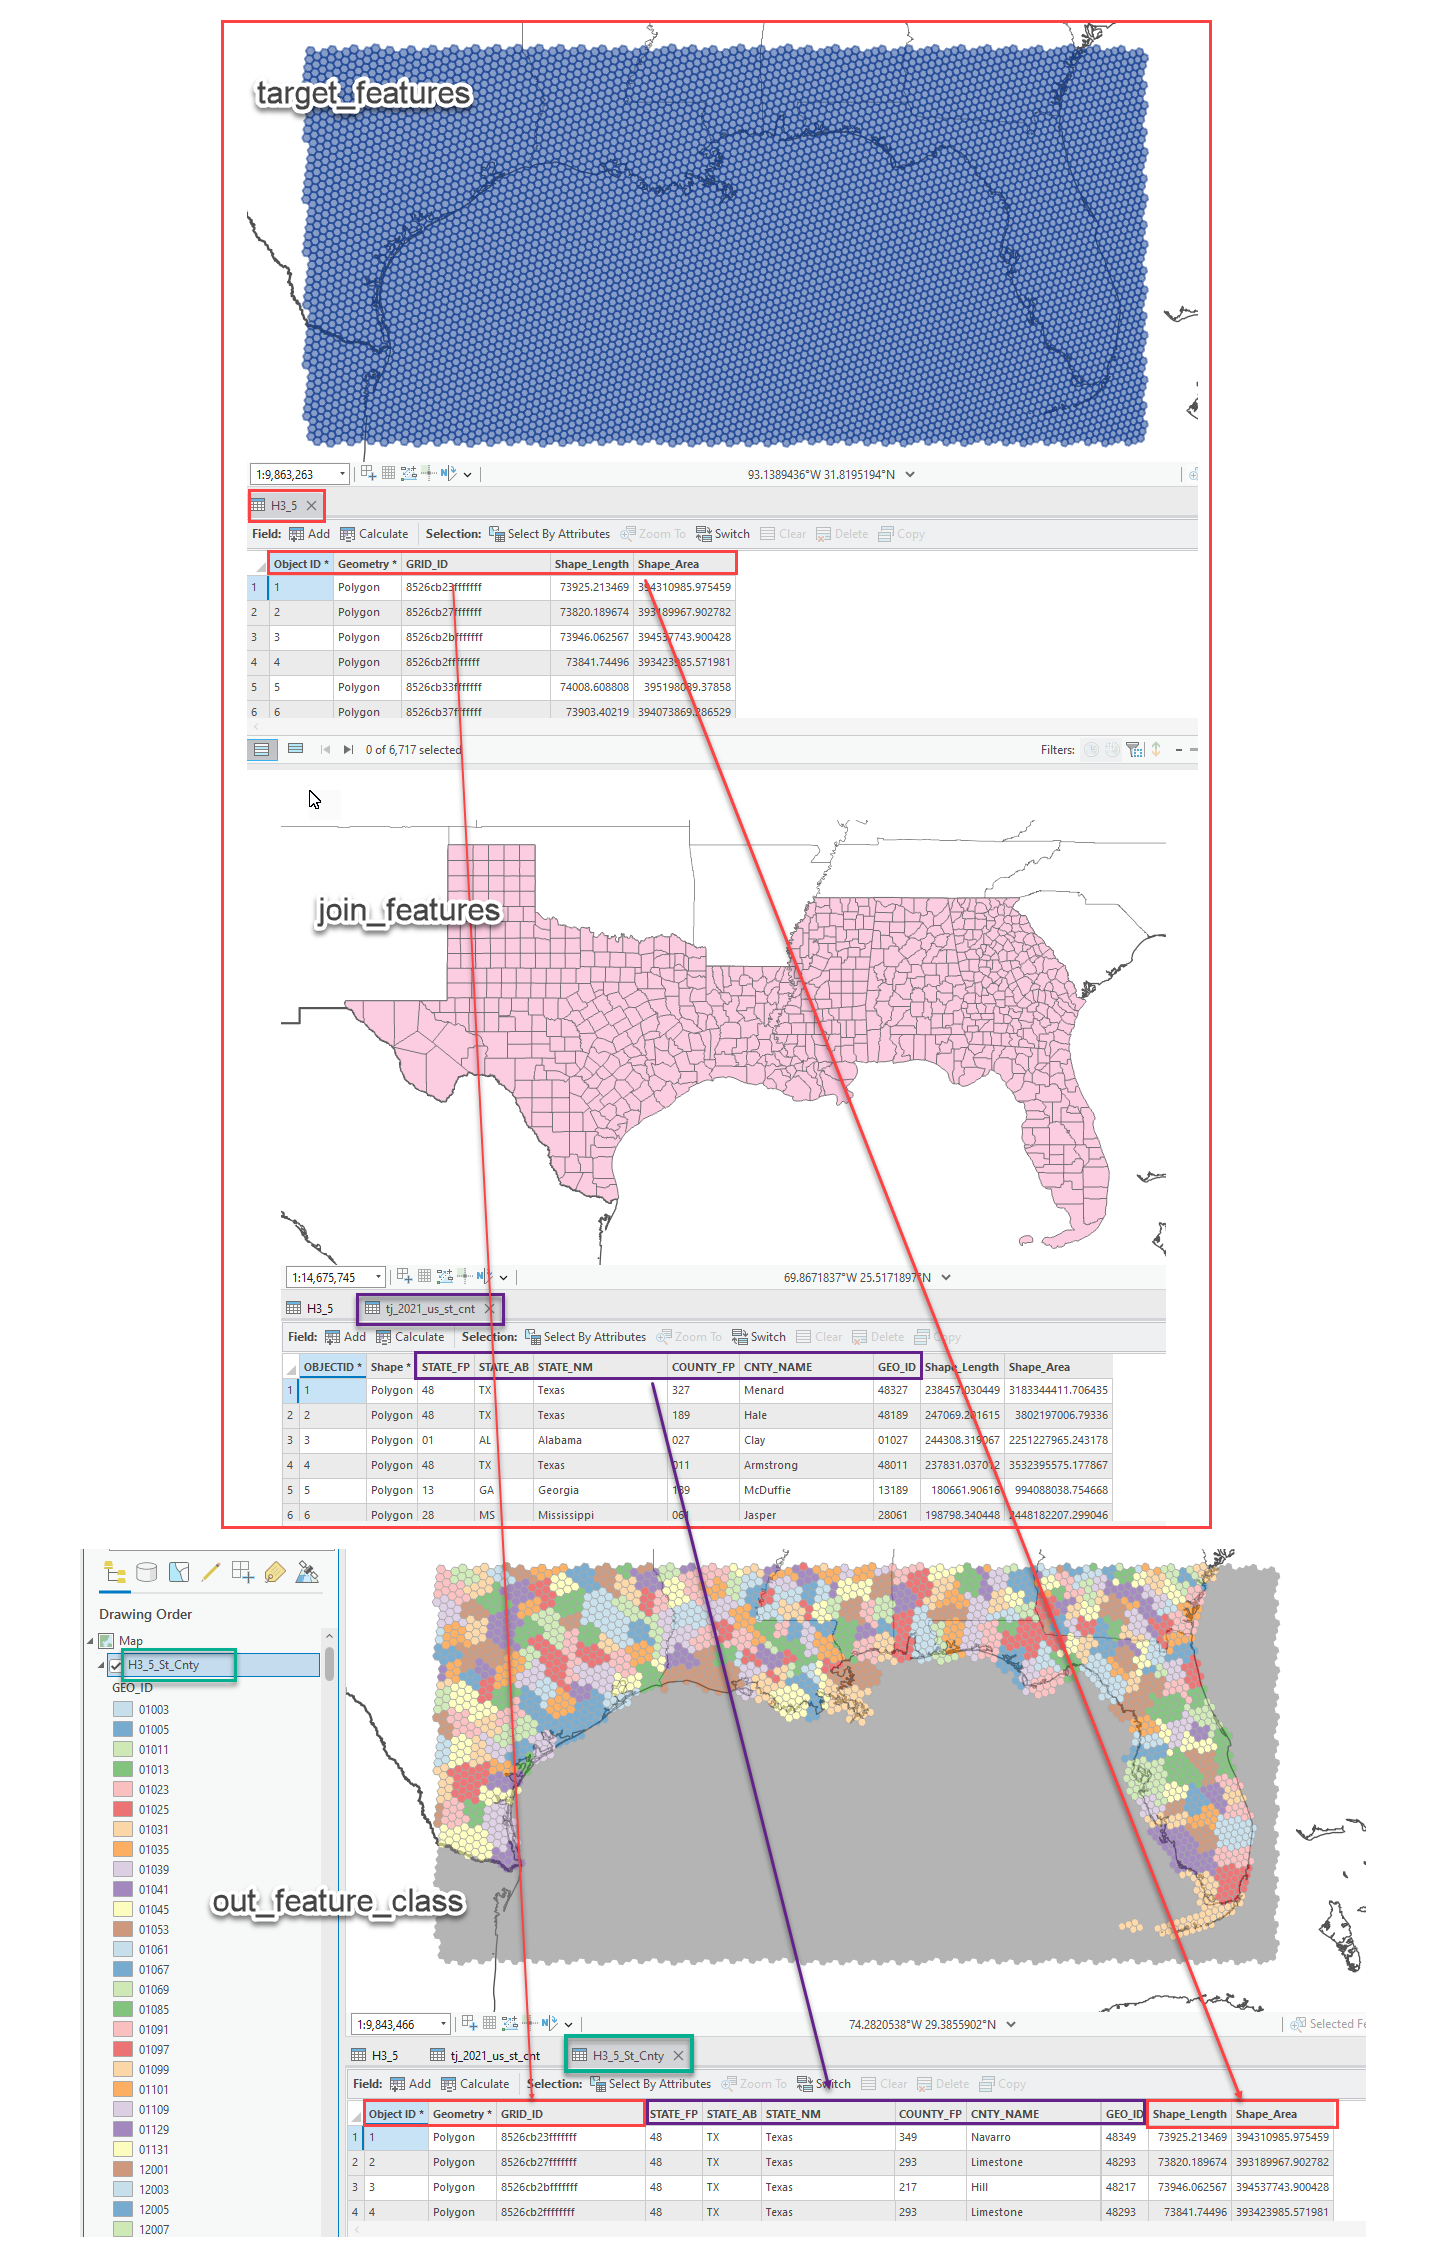

 ### Step 2. Adding estuarine drainage fields

In [ ]:
# # Step 2. Add estuarine drainage area attributes; target_features file is the output from step 1. 


# arcpy.analysis.SpatialJoin(
#     target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty",
#     join_features= r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\Estuarine_Drainage_Areas",
#     out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
#     join_operation="JOIN_ONE_TO_ONE",
#     join_type="KEEP_ALL",
#     field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty,'
#                   'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,'
#                   'target_features,STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,'
#                   'target_features,STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,'
#                   'target_features,STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,'
#                   'target_features,COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,'
#                   'target_features,CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,'
#                   'target_features,GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,'
#                   'join_features,EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,'
#                   'join_features,EDA_NAME,0,100',
#     match_option="HAVE_THEIR_CENTER_IN",
#     search_radius=None,
#     distance_field_name=""
# )
# # The DeleteField function is used to remove the extra fields created during the join.
# arcpy.management.DeleteField(
#     in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
#     drop_field="Join_Count;TARGET_FID",
#     method="DELETE_FIELDS"
# )

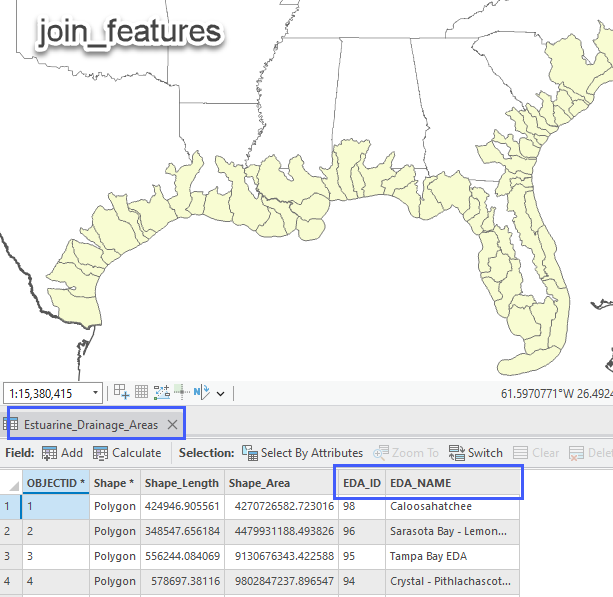

 ### Step 3. Adding 8-digit hydrologic unit codes

In [ ]:
# # Step 3. Add 8-digit hydrologic unit codes; target_features file is the output from step 2.

# arcpy.analysis.SpatialJoin(
#     target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA",
#     join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU8",
#     out_feature_class=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
#     join_operation="JOIN_ONE_TO_ONE",
#     join_type="KEEP_ALL",
#     field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,H3_5_St_Cnty_EDA,'
#                   'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
#                   'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
#                   'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
#                   'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
#                   'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
#                   'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
#                   'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
#                   'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
#                   'EDA_NAME,0,100;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
#                   'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
#                   'Shape_Area,-1,-1;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,join_feature,HUC_8,0,8',
#     match_option="HAVE_THEIR_CENTER_IN",
#     search_radius=None,
#     distance_field_name=""
# )
# # The DeleteField function is used to remove the extra fields created during the join.
# arcpy.management.DeleteField(
#     in_table=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
#     drop_field="Join_Count;TARGET_FID",
#     method="DELETE_FIELDS"
# )

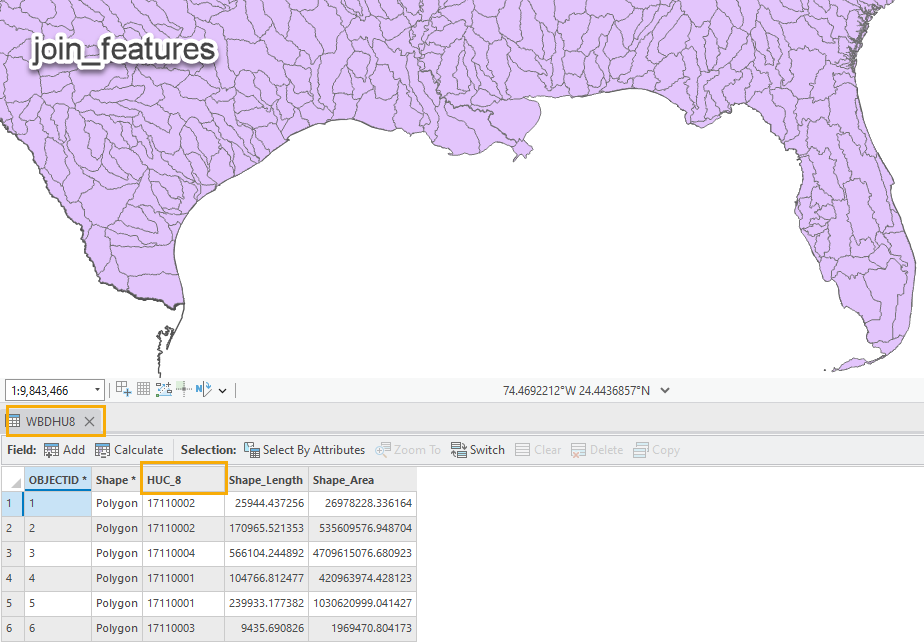

 ### Step 4. Adding 12-digit hydrologic unit codes

In [ ]:
# # Step 4. Add 12-digit hydrologic unit codes; target_features file is the output from step 3.

# arcpy.analysis.SpatialJoin(
#     target_features=r"K:\projects\rgmg\\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8",
#     join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\WBDHU12",
#     out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
#     join_operation="JOIN_ONE_TO_ONE",
#     join_type="KEEP_ALL",
#     field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,' 
#                   'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,' 
#                   'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,' 
#                   'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,' 
#                   'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,' 
#                   'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,' 
#                   'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,' 
#                   'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,' 
#                   'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,' 
#                   'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,' 
#                   'HUC_8,0,8;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,' 
#                   'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,' 
#                   'Shape_Area,-1,-1;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,join_features,HUC_12,0,12',
#     match_option="HAVE_THEIR_CENTER_IN",
#     search_radius=None,
#     distance_field_name=""
# )
# # The DeleteField function is used to remove the extra fields created during the join.
# arcpy.management.DeleteField(
#     in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
#     drop_field="Join_Count;TARGET_FID",
#     method="DELETE_FIELDS"
# )

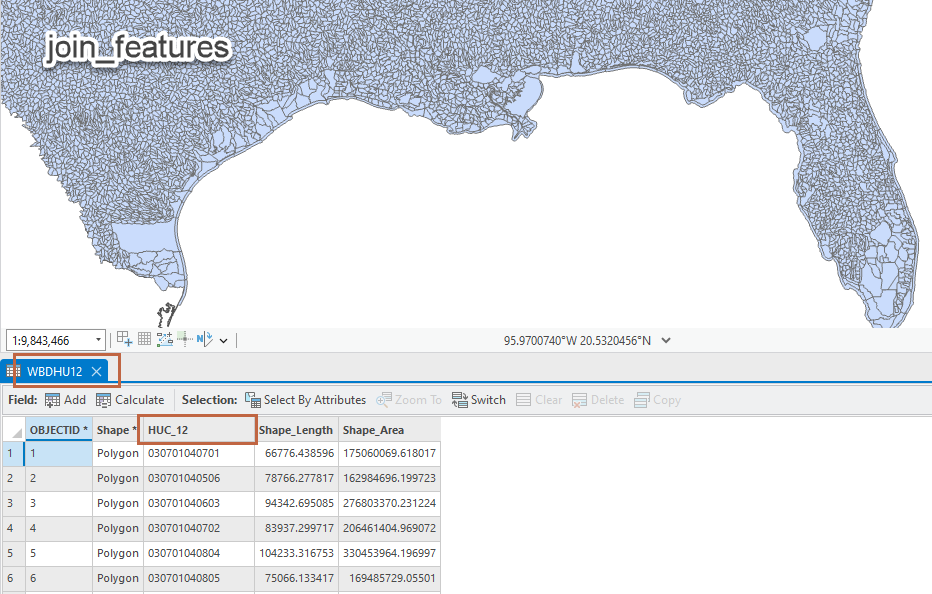

### Step 5. Adding land/water and population density information

In [ ]:
# # Step 5. Add FIPS_Lnd_Wtr and POP_SQMI fields, target_features file is the output from step 4.
# # This step calculates the population density and GEOID_Land (inside of the land area in the US counties)

# arcpy.analysis.SpatialJoin(
#     target_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12",
#     join_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3Grid_Inputs.gdb\Inputs\dtl_cnty_Census_ESRI",
#     out_feature_class=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
#     join_operation="JOIN_ONE_TO_ONE",
#     join_type="KEEP_ALL",
#     field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#,target_features,'
#                   'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,target_features,'
#                   'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,target_features,'
#                   'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,target_features,'
#                   'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,target_features,'
#                   'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,target_features,'
#                   'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,target_features,'
#                   'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,target_features,'
#                   'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,target_features,'
#                   'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,target_features,'
#                   'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,target_features,'
#                   'HUC_12,0,12;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,target_features,'
#                   'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,target_features,'
#                   'Shape_Area,-1,-1;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,'
#                   'join_features,POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,'
#                   'join_features,FIPS_Lnd_Wtr,0,15',
#     match_option="HAVE_THEIR_CENTER_IN",
#     search_radius=None,
#     distance_field_name=""
# )
# # The DeleteField function is used to remove the extra fields created during the join.
# arcpy.management.DeleteField(
#     in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
#     drop_field="Join_Count;TARGET_FID",
#     method="DELETE_FIELDS"
# )
# # replace the null values for 'GEO_ID' and 'FIPS_Lnd_Wtr' fields with "" 
# # the null values create problems for the field calculation operation 

# path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

# fieldNames = ['GEO_ID','FIPS_Lnd_Wtr']  
# fieldCount = len(fieldNames)  

# with arcpy.da.UpdateCursor(path, fieldNames) as curU:  
#     for row in curU:  
#         rowU = row  
#         for field in range(fieldCount):  
#             if rowU[field] == None:  
#                 rowU[field] = ""  
      
      
#         curU.updateRow(rowU)

# del curU

# # The CalculateField function is used to complete the 'FIPS_Lnd_Wtr' field
# # The attributes "GEOID_Water" and "Water" are calculated based on the already existing GEO_ID and FIPS_Lnd_Wtr attributes
# arcpy.management.CalculateField(
#     in_table=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
#     field="FIPS_Lnd_Wtr",
#     expression="attr(!GEO_ID!, !FIPS_Lnd_Wtr!)",
#     expression_type="PYTHON3",
#     code_block="""def attr(GEO_ID, FIPS_Lnd_Wtr):
#     if FIPS_Lnd_Wtr != "":
#          return FIPS_Lnd_Wtr
#     if FIPS_Lnd_Wtr == "" and GEO_ID != "":
#         return GEO_ID + "_Water"
#     if FIPS_Lnd_Wtr == "" and GEO_ID == "":
#         return "Water" """,
#     field_type="TEXT",
#     enforce_domains="NO_ENFORCE_DOMAINS"
# )

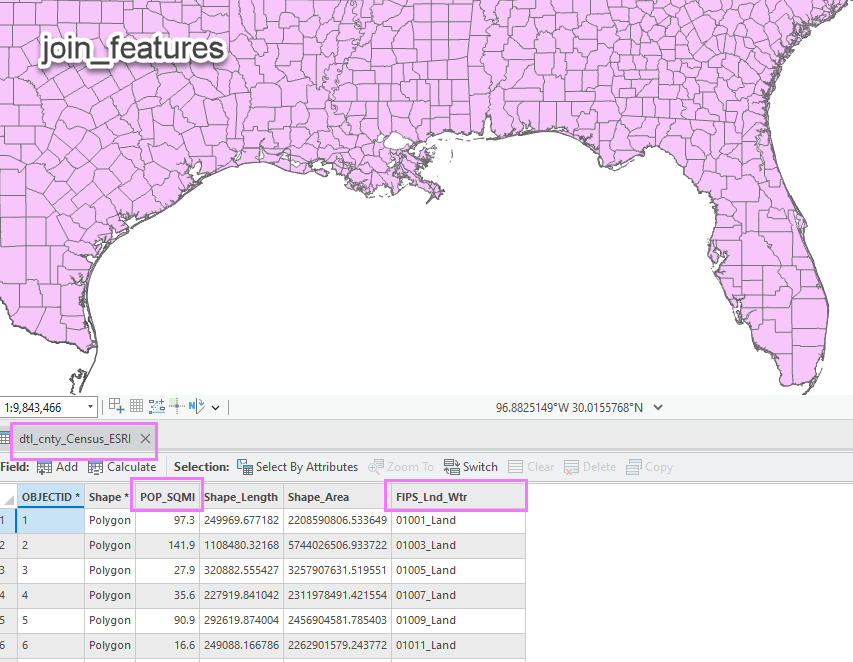

### Step 6. Replacing the null values with "" (for the text fields) and -999 (for the population density field). Exporting the final output layer

In [ ]:
# # replace the "null" values for text fields with "" 
# path = r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr"

# fieldTxt = ['STATE_FP','STATE_AB','STATE_NM','COUNTY_FP', 'CNTY_NAME', 'EDA_ID', 'EDA_NAME', 'HUC_8', 'HUC_12', 'FIPS_Lnd_Wtr'] 
# fieldTxtCount = len(fieldTxt)  

# with arcpy.da.UpdateCursor(path, fieldTxt) as curU:  
#     for row in curU:  
#         rowU = row  
#         for field in range(fieldTxtCount):  
#             if rowU[field] == None:  
#                 rowU[field] = ""  
      
      
#         curU.updateRow(rowU)

# del curU

# # replace the "null" values for the POP_SQMI field with -999
# fieldDb = ['POP_SQMI']  
# fieldDbCount = len(fieldDb)  

# with arcpy.da.UpdateCursor(path, fieldDb) as curU:  
#     for row in curU:  
#         rowU = row  
#         for field in range(fieldDbCount):  
#             if rowU[field] == None:  
#                 rowU[field] = -999  
      
      
#         curU.updateRow(rowU)

# del curU

# # export the H3 layer with reference attributes to the permanent feature dataset
# arcpy.conversion.ExportFeatures(
#     in_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\Temp\H3_5_St_Cnty_EDA_WB8_WB12_Lnd_Wtr",
#     out_features=r"K:\projects\rgmg\MSGeoProject\Projects\Grid_Effort\H3_5_10_Grd.gdb\H3_Grds_Reference_Flds\H3_5_ref_flds",
#     where_clause="",
#     use_field_alias_as_name="NOT_USE_ALIAS",
#     field_mapping='GRID_ID "GRID_ID" true true false 17 Text 0 0,First,#, in_features,'
#                   'GRID_ID,0,17;STATE_FP "STATE_FP" true true false 2 Text 0 0,First,#,in_features,'
#                   'STATE_FP,0,2;STATE_AB "STATE_AB" true true false 2 Text 0 0,First,#,in_features,'
#                   'STATE_AB,0,2;STATE_NM "STATE_NM" true true false 15 Text 0 0,First,#,in_features,'
#                   'STATE_NM,0,15;COUNTY_FP "COUNTY_FP" true true false 3 Text 0 0,First,#,in_features,'
#                   'COUNTY_FP,0,3;CNTY_NAME "CNTY_NAME" true true false 25 Text 0 0,First,#,in_features,'
#                   'CNTY_NAME,0,25;GEO_ID "GEO_ID" true true false 5 Text 0 0,First,#,in_features,'
#                   'GEO_ID,0,5;EDA_ID "EDA_ID" true true false 3 Text 0 0,First,#,in_features,'
#                   'EDA_ID,0,3;EDA_NAME "EDA_NAME" true true false 100 Text 0 0,First,#,in_features,'
#                   'EDA_NAME,0,100;HUC_8 "HUC_8" true true false 8 Text 0 0,First,#,in_features,'
#                   'HUC_8,0,8;HUC_12 "HUC_12" true true false 12 Text 0 0,First,#,in_features,'
#                   'HUC_12,0,12;POP_SQMI "POP_SQMI" true true false 8 Double 0 0,First,#,in_features,'
#                   'POP_SQMI,-1,-1;FIPS_Lnd_Wtr "FIPS_Land_Wtr" true true false 15 Text 0 0,First,#,in_features,'
#                   'FIPS_Lnd_Wtr,0,15;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,in_features,'
#                   'Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,in_features,Shape_Area,-1,-1',
#     sort_field=None
# )


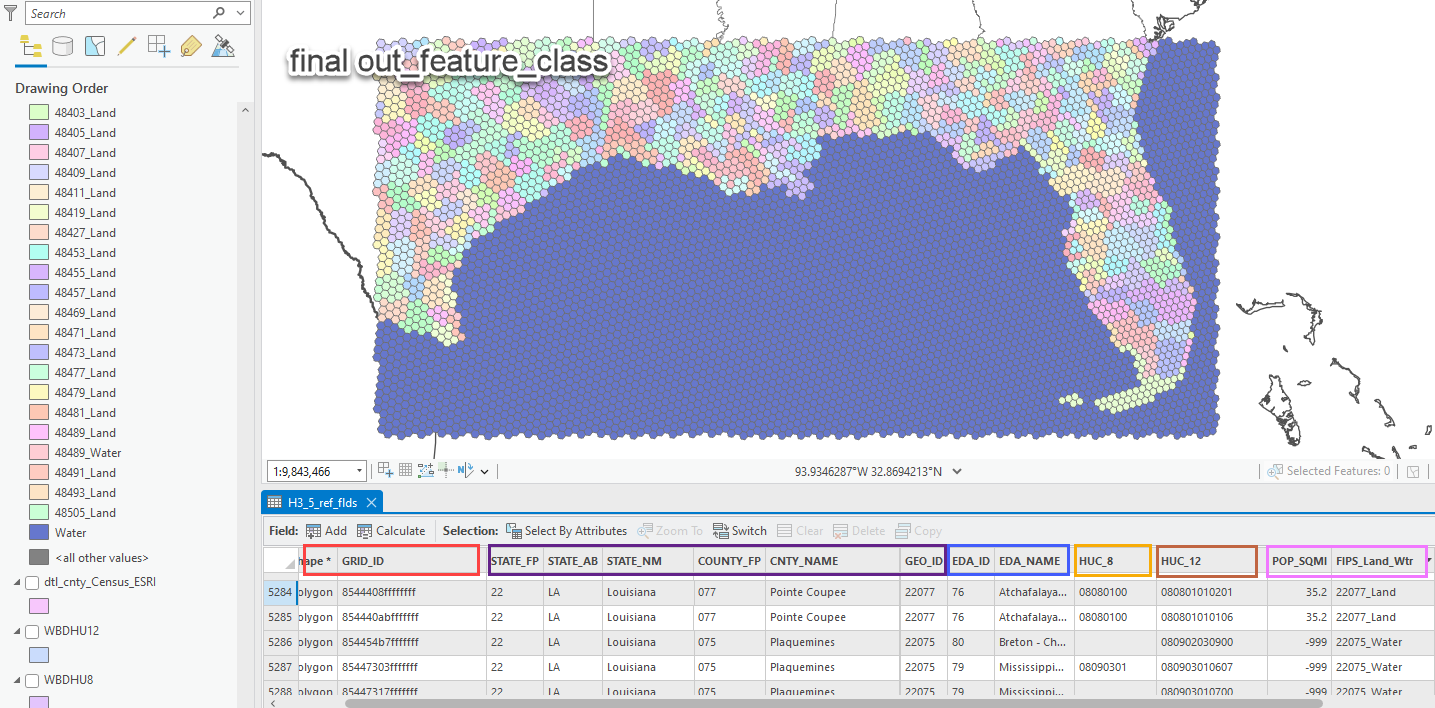